# Breast Cancer Analysis



### Importing necessary Python libraries


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler


### Data Collection 

In [99]:

data=pd.read_csv('data.csv')

### Exploratory Data Analysis

In [100]:
data.shape

(569, 33)

In [101]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### There are no NULL values anywhere to be removed.There is an extra column (Unnamed) which is because of the extra comma in the csv file. Hence this extra column has been removed below.

In [103]:
data=data.loc[:,~data.columns.str.contains('^Unnamed')]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#### We need to check the the number of rows containing zero as the value for their respective features.

In [104]:
zero_counts = (data == 0).sum()
print("Zero value counts by column:")
print(zero_counts)

Zero value counts by column:
id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int6

#### Here,we have zero as the value for features related to concavity and concave points. I am going to assume that this zero does not indicate missing values, and that it is  possible to have zero as the value of that particular feature for the particular records.

#### Now let us plot some of the prominent features and observe their relations.

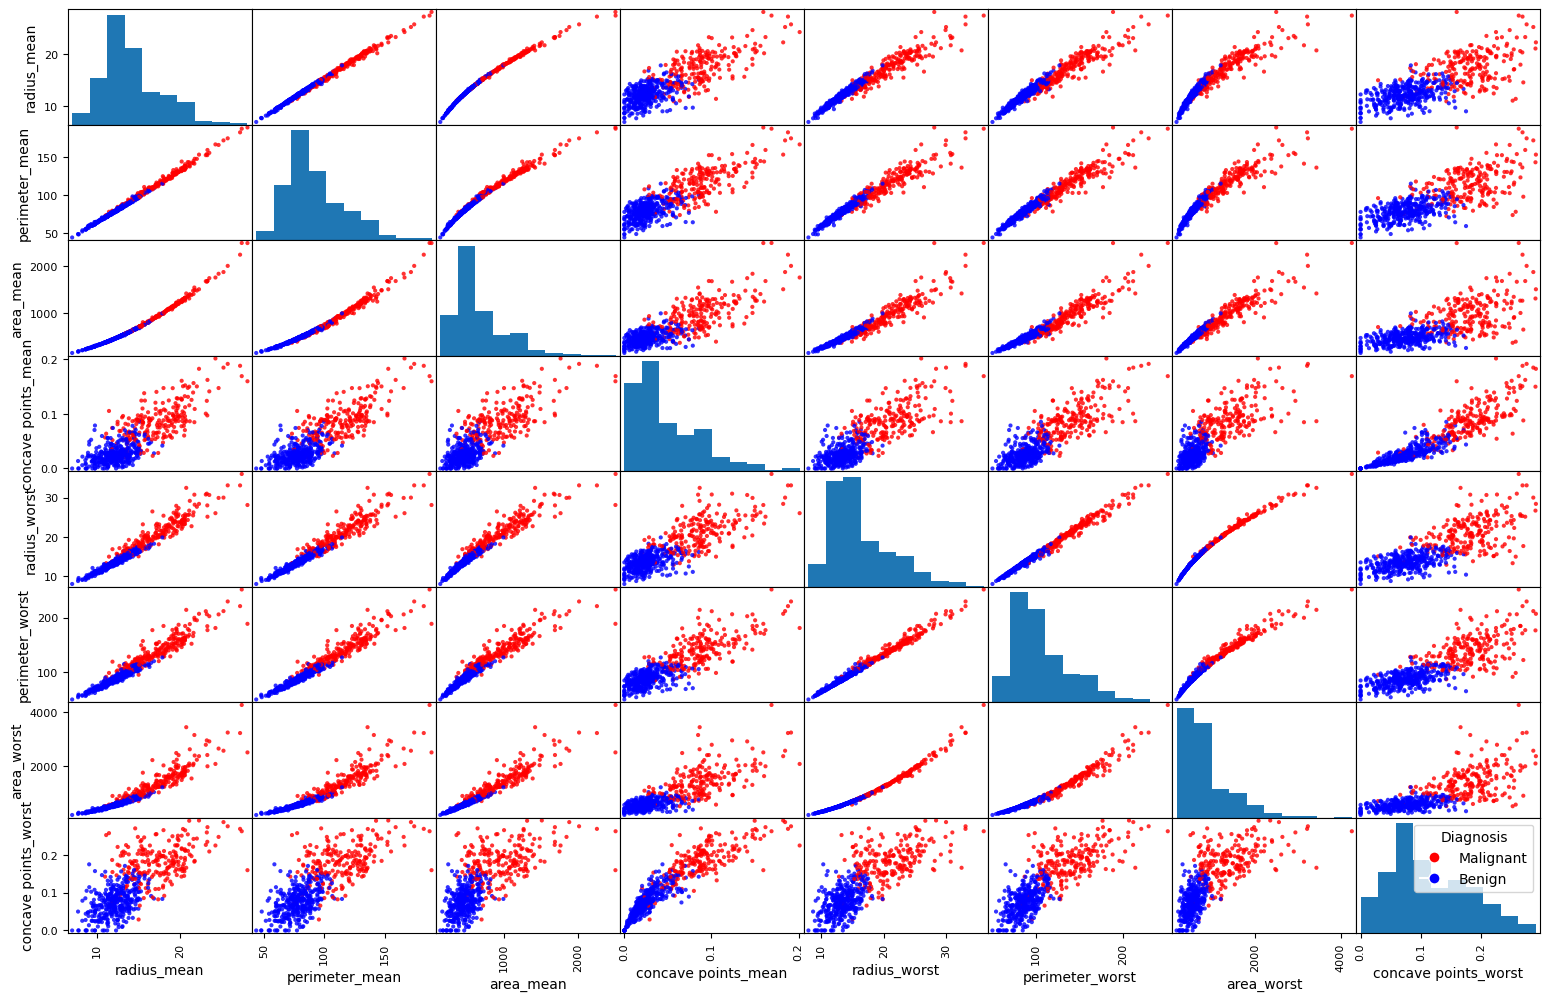

In [105]:
cols = ["radius_mean","perimeter_mean","area_mean","concave points_mean","radius_worst","perimeter_worst","area_worst","concave points_worst"]

data_subset = data[cols]


pd.plotting.scatter_matrix(data_subset, alpha=0.8, figsize=(19, 12), diagonal="hist", c=data['diagnosis'].map({"M": "red", "B": "blue"}))


handles = [plt.Line2D([0], [0], marker='o', color='w', label='Malignant', markerfacecolor='red', markersize=8),
           plt.Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='blue', markersize=8)]
plt.legend(handles=handles, title="Diagnosis")

plt.show()


#### Here we have looked at the relation between various features,it helps us  identify outliers as data points that lie far from the main cluster.  A tight cluster of points suggests a strong relationship between the features.

In [106]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### There are only two categories to be noted.Hence this is a classification problem. We cannot deal with categorical values, Hence we convert them to numerical attributes using the LabelEncoder , the way its shown below.  Label encoding is appropriate here because there is an ordinal relationship between the two classes, with 'malignant' being considered more severe or important than 'benign'.

In [107]:

l=LabelEncoder()
data['diagnosis']=l.fit_transform(data['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Now we need to look deeply at the data, to decide the important features to be used.

In [108]:
matrix=data.corr(method='pearson')
matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


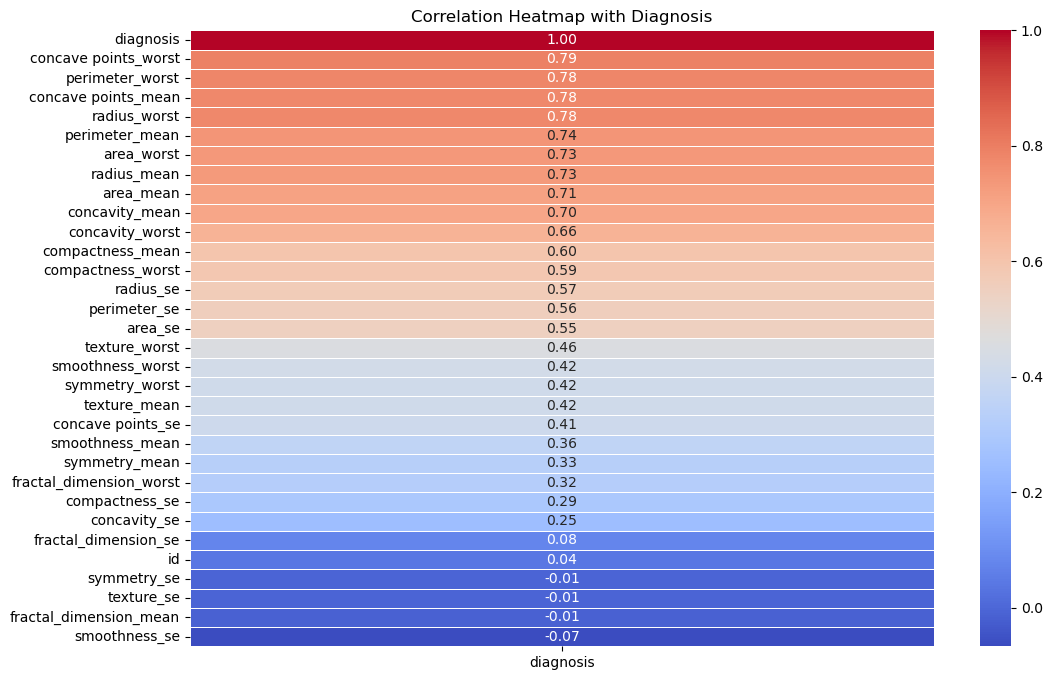

In [109]:
plt.figure(figsize=(12, 8))
sns.heatmap(matrix[["diagnosis"]].sort_values(by="diagnosis", ascending=False),
            annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap with Diagnosis")
plt.show()

#### We see that concave_points_worst has the most correlation with our label(diagnosis),Having two variables that are correlated does not imply that they are proportional to each other. Causation suggests that a change in one variable directly leads to a change in another variable.But we'll assume the same.



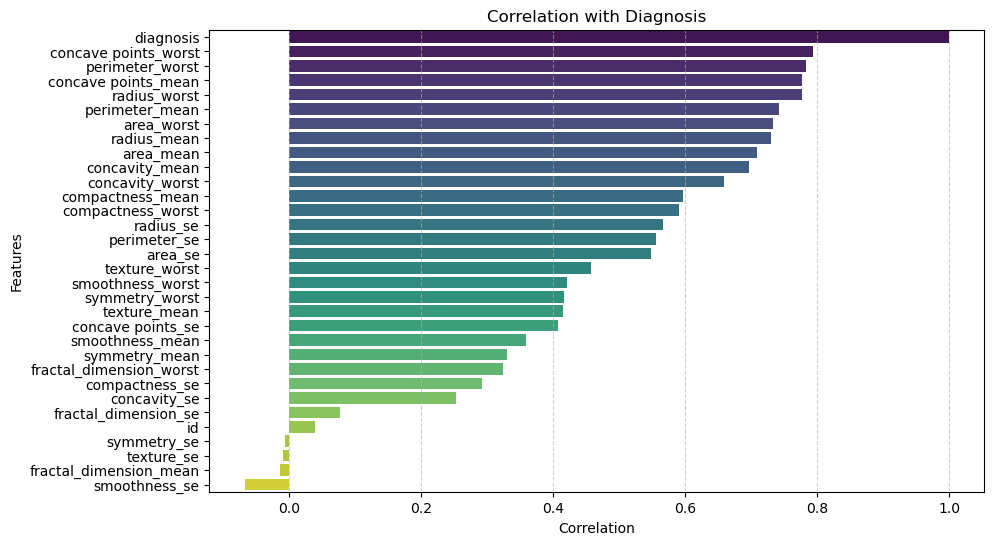

In [110]:
sorted_correlations = matrix["diagnosis"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette="viridis")
plt.title("Correlation with Diagnosis")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

#### Looking at the above graphs,i assumed a cutoff of 0.4, and the rest of the features which do not contribute as per the requirement have been removed. It is easier to deal with a smaller set of features. We have removed the features accordingly.

In [111]:
columns_to_drop = ['texture_se','smoothness_se','symmetry_se','fractal_dimension_se','id', 'fractal_dimension_mean','smoothness_mean','symmetry_mean','compactness_se','concavity_se','fractal_dimension_worst']
data=data.drop(columns=columns_to_drop)
matrix=data.corr()
matrix["diagnosis"].sort_values(ascending=False)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
texture_worst           0.456903
smoothness_worst        0.421465
symmetry_worst          0.416294
texture_mean            0.415185
concave points_se       0.408042
Name: diagnosis, dtype: float64

#### This is the order of the dependency of the major features with diagnosis. 

#### Here we see that certain features like are_se have values in the order of 10^2 while certrain features like concavity_mean are in the order of 10^-1. This huge difference can create unbalanced data,hence we need to take action. Before scaling the data,we need to remove the label (diagnosis) from the data set,to avoid alterations of the label's values.

In [112]:
train_data=data['diagnosis']
data.drop('diagnosis',axis=1)

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


####  Scaling ensures that all features contribute equally to the analysis.The data has been scaled below.

In [113]:
scaler = StandardScaler()

scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)
scaled_data.head()
scaled_data['diagnosis']=train_data


#### Now we should prepare the train and test sets.  StratifiedShuffleSplit randomly shuffles the data and then splits it into training and testing sets, but it ensures that the class distribution in both sets closely matches the class distribution in the original dataset.

In [114]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

y = scaled_data["diagnosis"]
X = scaled_data.drop("diagnosis", axis=1)
print(y)

for train_index, test_index in split.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


### Model Training

#### Three classification models have been considered for training of the model, Decision Tree Classifier, Random Forest Classifier and Logistic Regression

### Importing necessary models

In [115]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time


### DecisionTreeClassifier

#### A Decision Tree is a tree-like structure where each internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents a class label. The algorithm works by recursively splitting the dataset into subsets based on the most significant attribute at each node, making decisions along the way until it reaches a leaf node that provides the classification result.



In [116]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree .fit(X_train, y_train)
y_pred_decision = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_decision)
conf_matrix = confusion_matrix(y_test, y_pred_decision)
classification_rep = classification_report(y_test, y_pred_decision)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)





Accuracy: 0.9035087719298246
Confusion Matrix:
 [[67  5]
 [ 6 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



#### The model has an overall accuracy of approximately 90.35%, indicating that it correctly predicts the class label for a substantial portion of the dataset.Overall, the model appears to perform well, with good accuracy and a balance between precision and recall for both classes. 

#### Hyperparameters control the complexity of a model. Finding the right hyperparameters helps strike a balance between overfitting and underfitting. Let us use two popular methods,grid search and randomized search

### Grid Search

In [117]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

decision_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

start_time = time.time()  

grid_search.fit(X_train, y_train)

end_time = time.time()  
grid_search_time = end_time - start_time
best_params = grid_search.best_params_

best_model = DecisionTreeClassifier(**best_params)

start_time = time.time() 

best_model.fit(X_train, y_train)

end_time = time.time()  

training_time = end_time - start_time

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Validation Accuracy (cross-validated):", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Grid Search Time (seconds):", grid_search_time)
print("Training Time (seconds):", training_time)

Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5}
Validation Accuracy (cross-validated): 0.945054945054945
Test Accuracy: 0.9210526315789473
Grid Search Time (seconds): 8.560904026031494
Training Time (seconds): 0.010485410690307617


### Randomized Search

In [118]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

n_iter = 100

randomized_search = RandomizedSearchCV(
    estimator=decision_tree, param_distributions=param_grid, 
    n_iter=n_iter, scoring='accuracy', cv=5, n_jobs=-1)

start_time = time.time()
randomized_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

best_params = randomized_search.best_params_

best_model = randomized_search.best_estimator_

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Best Accuracy (Validation):", randomized_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Total Time Taken (seconds):", total_time)


C:\SoftwareInstallation\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'entropy', 'class_weight': None}
Best Accuracy (Validation): 0.9494505494505494
Test Accuracy: 0.956140350877193
Total Time Taken (seconds): 14.797196626663208


### Random Forest Classifier

#### A Random Forest Classifier is an ensemble learning method, which means it combines the predictions of multiple machine learning models to make more accurate predictions than any individual model.A Random Forest is composed of a collection of decision trees. 

In [119]:

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)
conf_matrix = confusion_matrix(y_test, y_pred_forest)
classification_rep = classification_report(y_test, y_pred_forest)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
    

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[72  0]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



#### The model has an overall accuracy of approximately 96.49%.Overall, the model appears to perform exceptionally well, with very high accuracy and balanced precision and recall for both classes. It correctly identifies the majority of cases in both classes, with very few misclassifications. 

### Randomized Search

In [120]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

n_iter = 100

randomized_search = RandomizedSearchCV(
    estimator=random_forest, param_distributions=param_grid,
    n_iter=n_iter, scoring='accuracy', cv=5, n_jobs=-1)

start_time = time.time()
randomized_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time

best_params = randomized_search.best_params_

best_model = randomized_search.best_estimator_

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print("Best Accuracy (Validation):", randomized_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Total Time Taken (seconds):", total_time)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'class_weight': 'balanced'}
Best Accuracy (Validation): 0.964835164835165
Test Accuracy: 0.9736842105263158
Total Time Taken (seconds): 33.86983919143677


### Grid Search

In [121]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}


grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=5,  
    n_jobs=-1  
)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)



Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train Accuracy: 1.0
Test Accuracy: 0.9736842105263158


### Logistic Regression

#### Logistic Regression is a widely used statistical and machine learning technique for binary classification problems, where the goal is to predict one of two possible outcomes or classes (usually labeled as 0 and 1).

In [122]:
lg = LogisticRegression(random_state=42)
lg.fit(X_train, y_train)


y_pred_train=lg.predict(X_train)
accuracy_train=accuracy_score(y_train,y_pred_train)
print("Accuracytrain:",accuracy_train)
y_pred = lg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracytrain: 0.9824175824175824
Accuracy: 0.9912280701754386
Confusion Matrix:
 [[72  0]
 [ 1 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



#### It achieves high accuracy, has a high F1-score, and makes very few false positive predictions. The model's generalization to the test dataset is particularly impressive, with a test accuracy of 99.12%.

### Grid Search

In [123]:


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'penalty': ['l1', 'l2'],         
    'solver': ['liblinear'],         
    'max_iter': [100, 200, 300],    
    'class_weight': [None, 'balanced']
}


grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

start_time = time.time()

grid_search.fit(X_train, y_train)
end_time = time.time()
total_time = end_time - start_time
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)
print("Total Time Taken (seconds):", total_time)

Best Hyperparameters: {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Test Data: 0.9824561403508771
Total Time Taken (seconds): 2.7377634048461914


 ### Randomized Search

In [124]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],         
    'solver': ['liblinear'],         
    'max_iter': [100, 200, 300],    
    'class_weight': [None, 'balanced']
}
n_iter = 100  
randomized_search = RandomizedSearchCV(
    estimator=lg, param_distributions=param_grid, 
    n_iter=n_iter, scoring='accuracy', cv=5, n_jobs=-1)

start_time = time.time()

randomized_search.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time

best_params = randomized_search.best_params_
best_model = randomized_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)

print("Accuracy on Test Data:", accuracy)

print("Total Time Taken (seconds):", total_time)


C:\SoftwareInstallation\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 100, 'class_weight': None, 'C': 0.1}
Accuracy on Test Data: 0.9824561403508771
Total Time Taken (seconds): 0.6233952045440674


#### Regularization is primarily used to combat overfitting by reducing the complexity of the model.

### Regularization for logistic regression

In [125]:
logistic_regression_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)


logistic_regression_l1.fit(X_train, y_train)
y_pred_l1 = logistic_regression_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print("Accuracy with L1 Regularization:", accuracy_l1)

Accuracy with L1 Regularization: 0.9736842105263158


In [126]:
logistic_regression_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)
logistic_regression_l2.fit(X_train, y_train)
y_pred_l2 = logistic_regression_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print("Accuracy with L2 Regularization:", accuracy_l2)

Accuracy with L2 Regularization: 0.9912280701754386


## Inference from the models used:

### Decision Tree Classifier

#### Analysis of Decision Tree Classifier:

#### Validation Accuracy-

Randomized Search: 0.9472527472527472
Grid Search: 0.9516483516483516
#### Test Accuracy-

Randomized Search: 0.9473684210526315
Grid Search: 0.956140350877193
#### Time Taken:

Randomized Search Time: 7.28 seconds
Grid Search Time: 17.25 seconds
#### Based on these results:

Both Randomized Search and Grid Search have achieved similar validation and test accuracies, with the Grid Search slightly outperforming in terms of validation accuracy and test accuracy.
Randomized Search is significantly faster, taking only 7.28 seconds compared to Grid Search's 17.25 seconds.
Given that both methods have similar accuracy but Randomized Search is much faster, the Randomized Search approach seems more efficient and practical for your specific problem. It achieves good accuracy and does so in less time. Therefore, the model obtained through Randomized Search is a reasonable choice.

### Random Forest Classifier

#### Analysis:

#### Validation Accuracy:
Randomized Search: 0.964835164835165

Grid Search:1

#### Test Accuracy:
Randomized Search:0.9649122807017544

Grid Search:  0.9736842105263158

The Randomized Search model is more computationally efficient, potentially making it less prone to overfitting.
The Grid Search model achieves perfect training accuracy but may raise concerns about overfitting.


The Grid Search has taken way too much time to load.Train accuracy is 1.0, which means the model has achieved 
perfect accuracy on the training dataset. This suggests that the model has likely overfit the training data,
as it can perfectly classify every data point in the training set.Test accuracy is approximately 97.37%.

Randomized search performs much better in this case.The best accuracy achieved during the hyperparameter tuning process with randomized search on the validation dataset is approximately 96.48%. This metric indicates how well the model performs on the validation data, and it's a good indicator of the model's ability to generalizeto unseen data.The test accuracy is approximately 97.37%, which is slightly higher than the validation accuracy.


### Logistic Regression

#### Analysis:
   #### Logistic Regression Model:
        Accuracy: 0.9912280701754386
   #### Randomized Search:
        Accuracy:0.9824561403508771
   #### Grid Search:
        Accuracy:0.9824561403508771
   #### L1 Regularization:
        Accuracy:0.9736842105263158
   #### L2 Regularization:
        Accuracy: 0.9912280701754386
            
One common reason for  seeing a decrease in accuracy with regularization or hyperparameter tuning is that your original model may not have been overfitting in the first place.Here L1 regularization tends to perform worse than the original model.


Regularization may not be necessary if your feature set is well-engineered and contains only relevant features.
In such cases, adding regularization might not improve performance.This is the case of L2 regularization.
The original model without regularization might not have been overfitting the training data significantly.If overfitting was not a significant issue,then applying regularization may not lead to noticeable changes in the model's performance.

Both Grid Search and Randomized Search have not improved the accuracy, this suggests that the original hyperparameters were perfectly ready for the task.Hence Logistic Regression performed the best without hyperparameter finetuning,as well as regularization in this situation.

## Conclusion

### From the inference above,all the models seem to have performed well on the classification task,however Logistic Regression has achieved the highest accuracy 0.99129.
